### 1. Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
data.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


#### Список полей датафрейма:

'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:

'gender' — пол;

'Near_Location' — проживание или работа в районе, где находится фитнес-центр;

'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — 
в таком случае фитнес-центр хранит информацию о работодателе клиента);

Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);

'Phone' — наличие контактного телефона;

'Age' — возраст;

'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:

'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);

'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);

'Group_visits' — факт посещения групповых занятий;

'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;

'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;

'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

### 2. Исследовательский анализ данных (EDA)

##### 2.1. Изучим результат применения метода describe():

In [4]:
data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


#### Вывод: 
Средняя длительность абонемента - около 4,5 месяцев; средний возраст клиента - 29 лет; типичный клиент посещает фитнес в среднем 1,7 раза в неделю; групповые занятия не пользуются особой популярностью у клиентов; доля оттока - 26,5%.  

2.2. Применим метод info():

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


#### Вывод:  
После применения метода info(), видим, что в данных нет пропусков, типы данных корректировать не нужно

##### 2.3. Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby()):

In [6]:
groups_mean = data.groupby('Churn').mean()

In [7]:
groups_mean

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Вывод: 

1) Распределение по полу среди тех, кто ушел и тех, кто остался почти одинаковое 

2) 87% живущих рядом с фитнесом - остались 

3) Партнерская скидка также влияет на лояльность клиента фитнесу 

4) у ушедших клиентов оставалось уже мало времени до конца абонемента. 

Средний возраст у ушедших клиентов чуть меньше, чем у тех, кто остался (26,9 vs. 29,9)

##### 2. 4. Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток):

In [8]:
left_clients = data[data['Churn']==1]
stayed_clients = data[data['Churn']==0]
distplot_columns = ['Avg_additional_charges_total', 'Avg_class_frequency_total', 
                    'Avg_class_frequency_current_month', 'Lifetime', 'Age', 
                    'Contract_period', 'Month_to_end_contract']

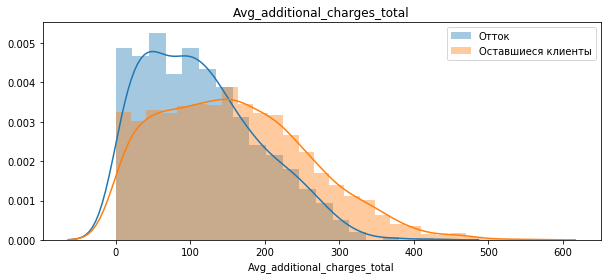

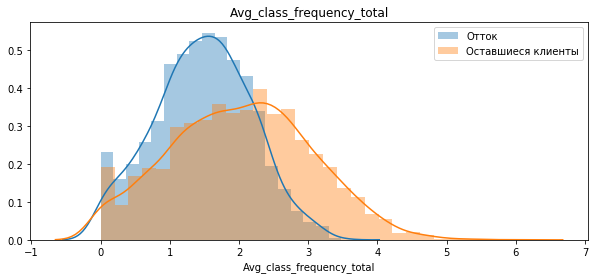

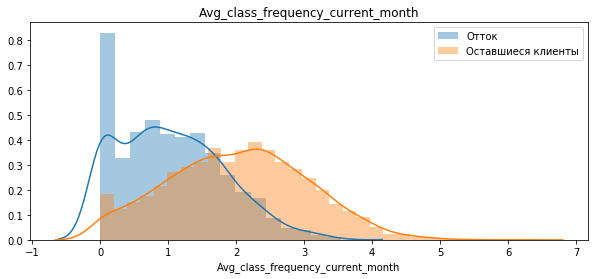

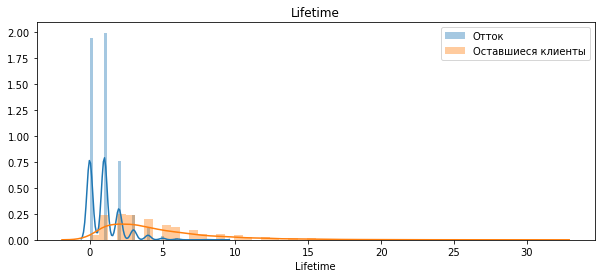

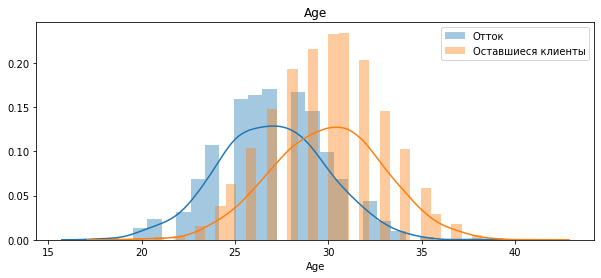

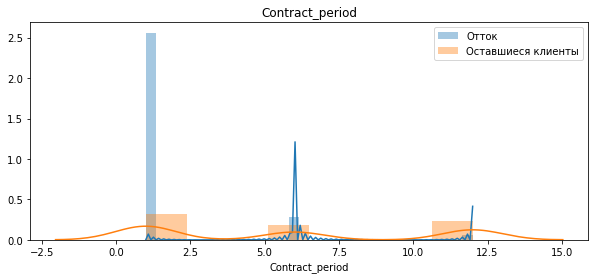

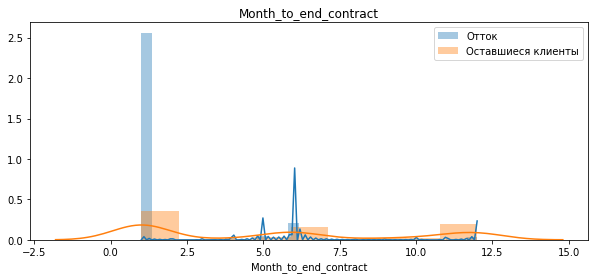

In [9]:
for column in distplot_columns: 
    plt.figure(figsize=(10,4)) 
    plt.title(column)
    sns.distplot(left_clients[column])
    sns.distplot(stayed_clients[column])
    plt.legend(['Отток', 'Оставшиеся клиенты'])
    plt.show()

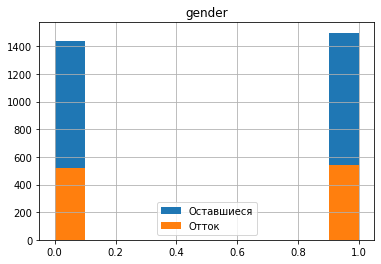

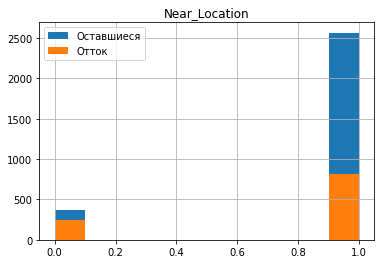

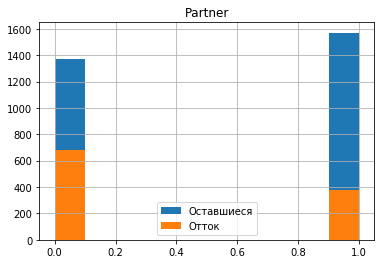

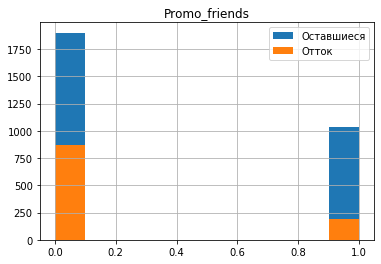

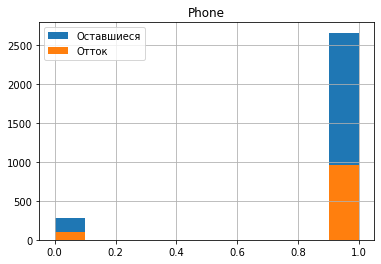

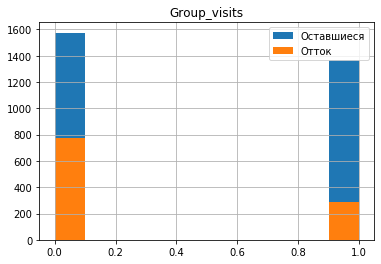

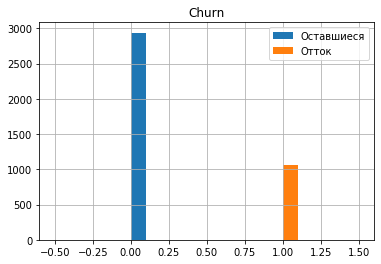

In [10]:
for column in data.columns:
    if column not in distplot_columns:
        data.groupby('Churn')[column].hist()
        plt.title(column)
        plt.legend(['Оставшиеся', 'Отток'])
        plt.show()

##### Вывод:
Явной зависимости факта оттока от признаков не наблюдаем

##### 2. 5. Построим матрицу корреляций:

Text(0.5, 1, 'Тепловая карта корреляции')

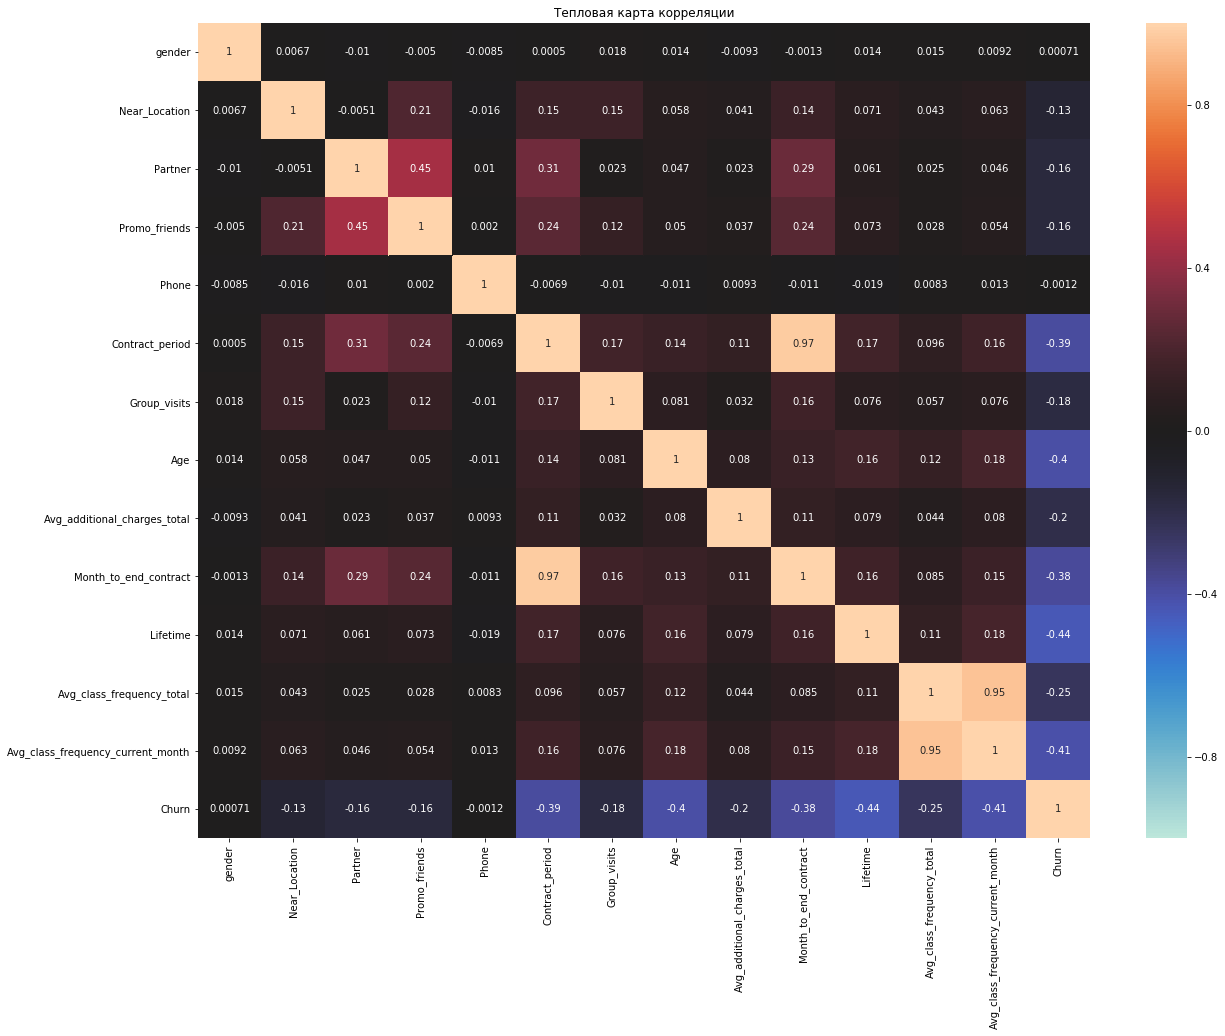

In [11]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, fmt='.2g')
plt.title('Тепловая карта корреляции')

#### Вывод: 
Сильно корреллируют длительность абонемемента (Contract_period) и срок до конца абонемента (Month_to_end_contract), а также средняя частота посещений в неделю за предыдущий месяц (Avg_class_frequency_current_month) и средняя частота посещений в неделю за все время с начала действия абонемента (Avg_class_frequency_total) 

### 3. Модель прогнозирования оттока клиентов

##### 3.1. Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

##### Разобьем данные на обучающую и валидационную выборку функцией train_test_split():

In [12]:
X = data.drop('Churn', axis = 1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

##### Обучим модель на train-выборке двумя способами:логистической регрессией, случайным лесом:

In [13]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)


X_test_st = scaler.transform(X_test)

forest_model = RandomForestClassifier(random_state = 0, n_estimators = 100)
forest_model.fit(X_train_st, y_train)
forest_predictions = forest_model.predict(X_test_st) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, forest_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, forest_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, forest_predictions)))
print()

logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train_st, y_train)
logistic_predictions = logistic_model.predict(X_test_st) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, logistic_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, logistic_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, logistic_predictions)))

Accuracy: 0.92
Precision: 0.84
Recall: 0.81

Accuracy: 0.92
Precision: 0.85
Recall: 0.83


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



#### Вывод: 
Метрика Accuracy(доля правильных ответов) у обоих методов получила одинаковые значения, метрика Precision (точность) выше у логистической регрессии, метрика Recall(полнота) так же выше у логистической регрессии. Так считается, что чем ближе показатели к 1, тем лучше, то получается, что логистическая регрессия в целом оказалась лучше.

### 4. Кластеризация клиентов

##### 4.1. Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов):
Стандартизируем данные.Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. 

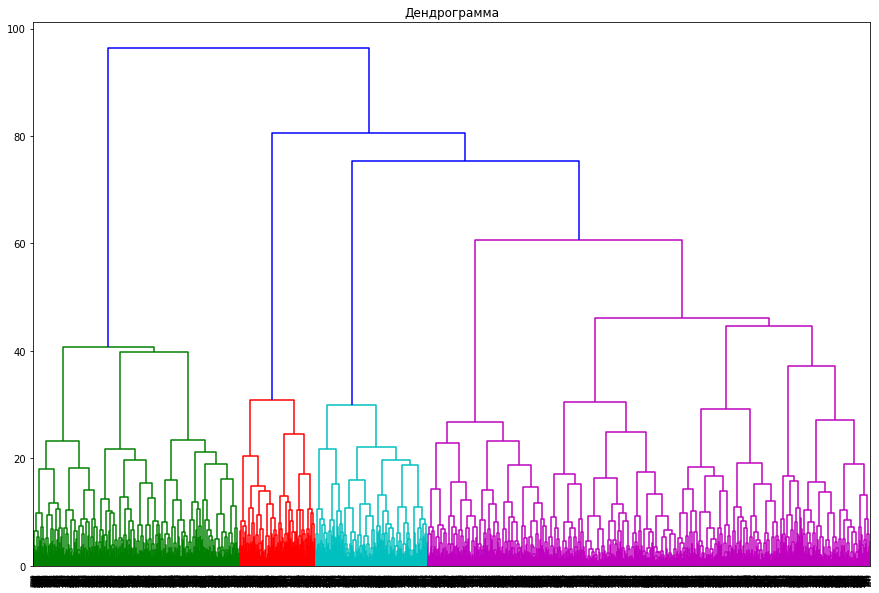

In [14]:
data_st_x = scaler.transform(data.drop('Churn', axis = 1)) 
km = KMeans(n_clusters = 5, random_state = 0)            
labels = km.fit_predict(data_st_x)
data['cluster_km'] = labels
linked = linkage(X_train_st, method = 'ward') 
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show()

Глядя на получившийся график, можно выделить 4 кластера

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. Договоримся за число кластеров принять n=5:

стандартизируем данные:

In [15]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
km = KMeans(n_clusters = 5) 
labels = km.fit_predict(X_sc) 

определим функцию отрисовки графиков попарных признаков для кластеров:

In [16]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

сохраним метки кластера в поле датасета:

In [17]:
data['cluster_km'] = labels

выведем статистику по средним значениям признаков по кластеру:

In [18]:
data.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.560142,0.976415,0.359670,0.238208,0.998821,2.685142,0.469340,30.110849,161.665710,2.476415,4.889151,2.846441,2.844923,0.067217
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.484512,1.000000,0.351072,0.237490,1.000000,1.954726,0.341541,28.165210,131.444212,1.862589,2.430500,1.246208,1.011058,0.515488
4,0.503490,0.959123,0.782652,0.573280,1.000000,10.923230,0.546361,29.991027,160.881742,9.983051,4.748754,1.977676,1.970029,0.027916


Описание получившихся кластеров:

Кластер 0

 - Отток - 52% - самый высокий
 - Находятся рядом с фитнес-центром
 - В основном обладатели коротких абонементов на 1-3 месяца
 - Наименьшее количество посещений за всё время и в последний месяц

Кластер 1

 - Отток - 7%
 - Находятся недалеко от фитнес-центра
 - Чаще всех посещают клуб - 2,8 раза в неделю
 - Абонемент НЕ на длительный срок - в среднем 2,8 месяцев
 
Кластер 2

 - Отток - 3% - самый низкий
 - Находятся недалеко от фитнес-центра
 - Преобладают сотрудники компаний-партнеров - 78%
 - Покупают абонемент на длительный срок - 12 месяцев
 - Чаще всех посещают групповые занятия - 54%
 - Чаще всех пришли по промо 
 
Кластер 3

 - Отток - 44%
 - Похожи на кластер 0, но находятся в другом районе
 - Только 7% пришли по промо 
 - Реже всех посещают групповые занятия
 
Кластер 4

 - Отток - 26%
 - Находятся недалеко от фитнес-центра
 - Нет мобильного номера
 - В среднем 4,5 месяцев абонементы

отрисуем графики для признаков кластеров:

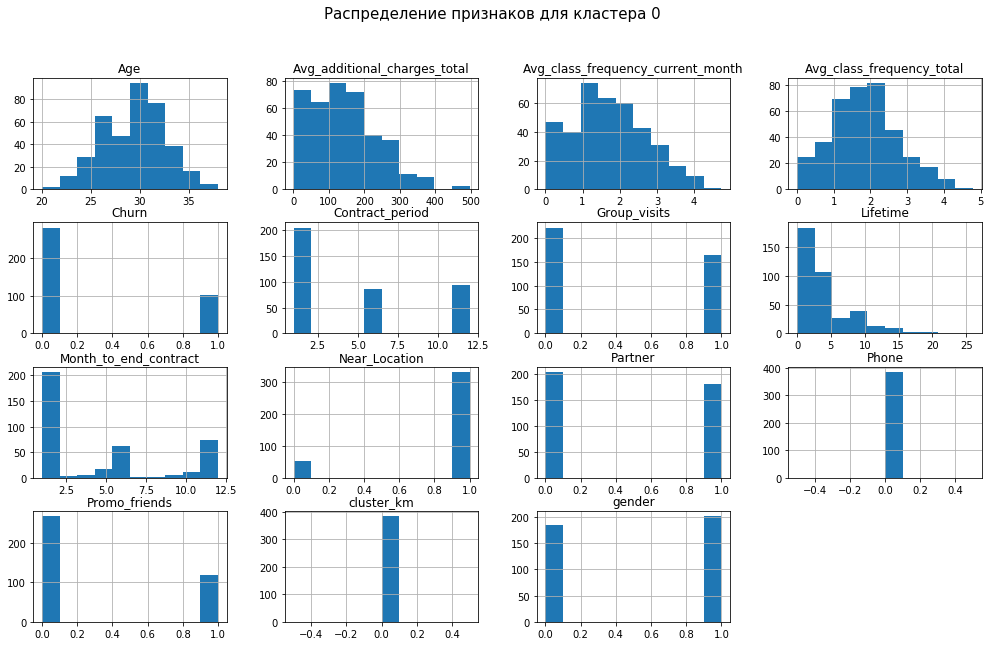

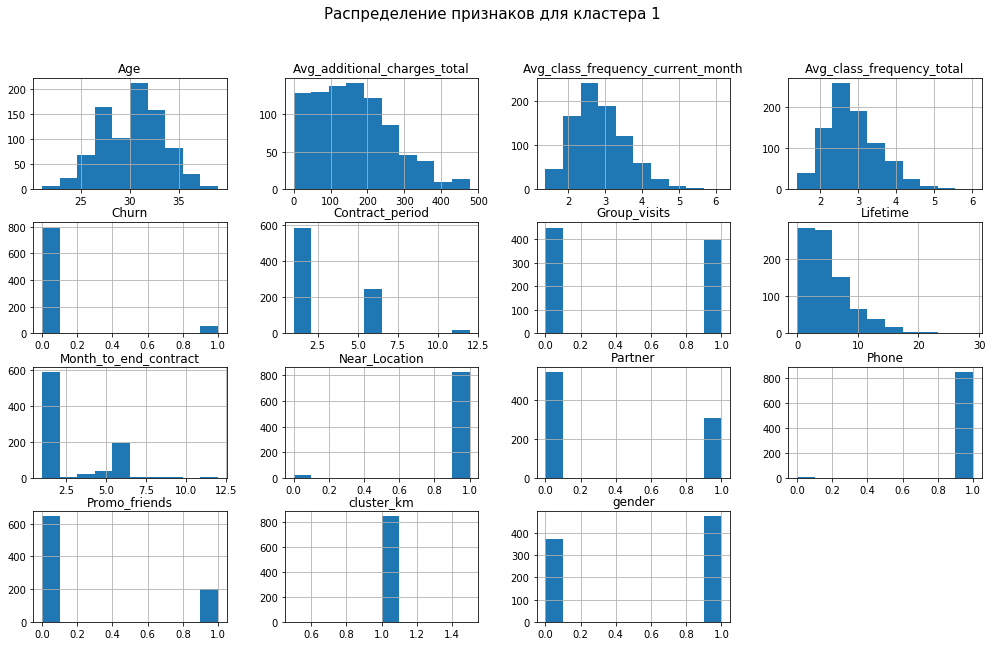

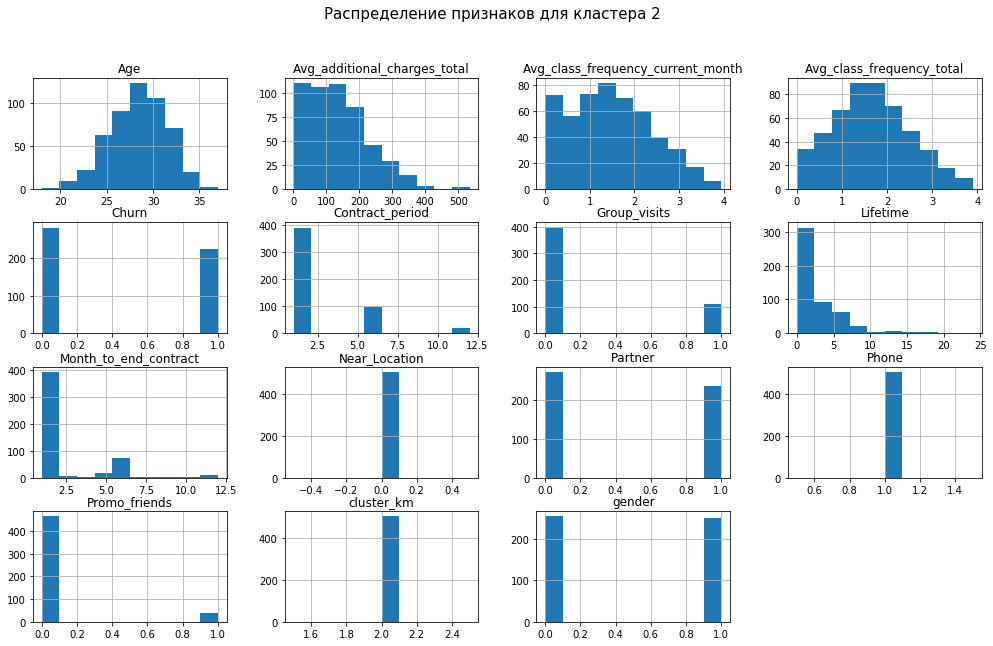

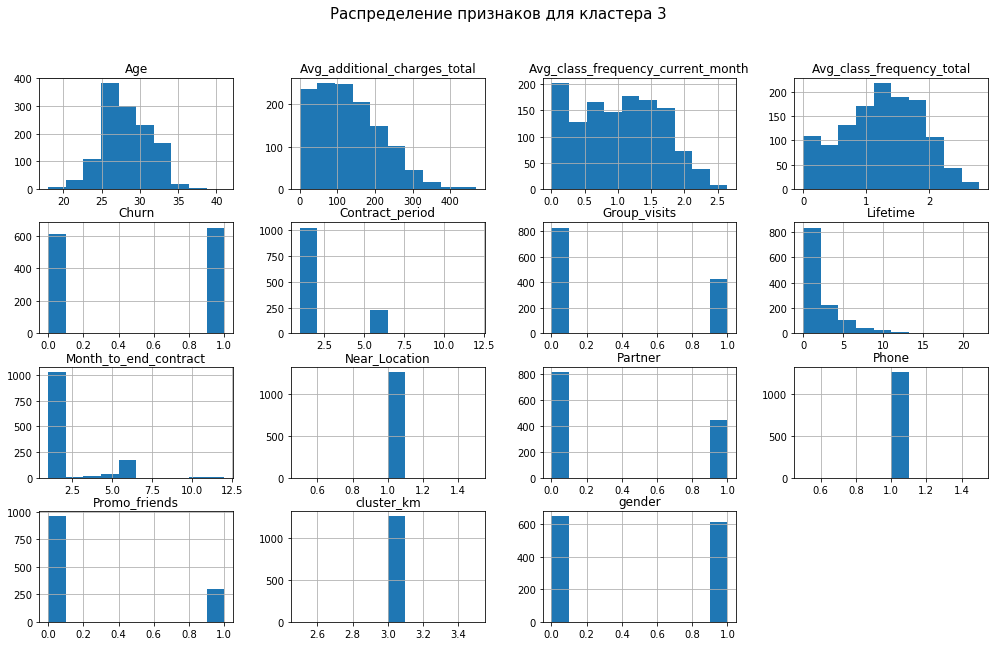

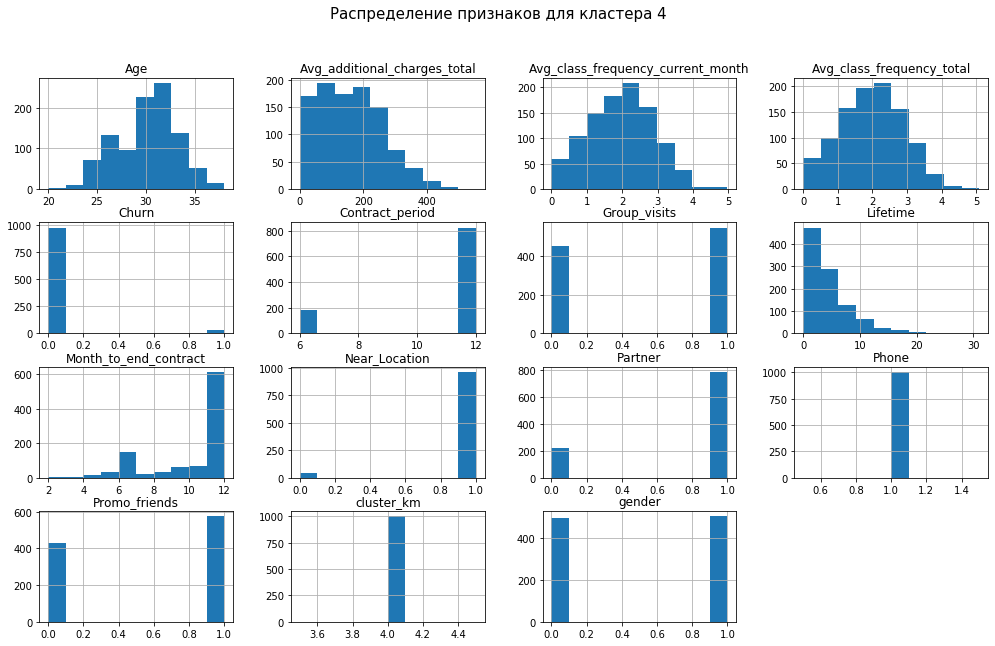

In [19]:
for value in [0, 1, 2, 3, 4]:
    data[data['cluster_km']==value].hist(figsize=(17,10))
    plt.suptitle('Распределение признаков для кластера {}'.format(value), fontsize = 15)
    plt.show()

Доля оттока для кластеров:

In [20]:
cluster_churn = data.groupby('cluster_km').mean()

In [21]:
cluster_frame = pd.DataFrame({'count': data.groupby('cluster_km')['cluster_km'].count(), 'share': cluster_churn['Churn'].round(2)})
cluster_frame.sort_values('count')

,count,share
cluster_km,,
0,385,0.27
2,505,0.44
1,848,0.07
4,1003,0.03
3,1259,0.52


##### Вывод:
Получается, что кластер №1 - наиболее склонен к оттоку (56%), затем  - №2 и №4 (27% и 26%). Наименее склонен к оттоку кластер №0. К тому же, кластер № - самый большой по количеству - 1253 человека.

### 5. Выводы и базовые рекомендации по работе с клиентами

#### Выводы:

1. В этом проекте мы исследовали причины оттока клиентов фитнес-клуба, прогнозировали вероятность оттока в будущем и готовили план действий по удержанию клиентов.

2. Типы данных оказались подходящими для дальнейшей работы и не содержали пропусков.

3. После применения метода describe() мы узнали некоторые средние характеристики клиентов клуба:
Средняя длительность абонемента - около 4,5 месяцев; 
средний возраст клиента - 29 лет; 
типичный клиент посещает фитнес в среднем 1,7 раза в неделю; 
групповые занятия не пользуются особой популярностью у клиентов; 
доля оттока - 26,5%. 

4. Если сравнивать ушедших клиентов с оставшимися, то:

 - распределение по полу среди тех, кто ушел и тех, кто остался почти одинаковое 

 -  87% живущих рядом с фитнесом - остались 

 - партнерская скидка также влияет на лояльность клиента фитнесу 

 - у ушедших клиентов оставалось уже мало времени до конца абонемента. 

  - средний возраст у ушедших клиентов чуть меньше, чем у тех, кто остался (26,9 vs. 29,9). При этом явной зависимости факта оттока от признаков  мы не увидели.

5. При построении тепловой карты / расчета корреляции мы увидели, что 

 - Сильно корреллируют длительность абонемемента (Contract_period) и срок до конца абонемента (Month_to_end_contract), а также средняя частота посещений в неделю за предыдущий месяц (Avg_class_frequency_current_month) и средняя частота посещений в неделю за все время с начала действия абонемента (Avg_class_frequency_total)
 
6. При построении и обучении прогностической модели мы использовали 2 способа: логистическую регрессию и метод случайного леса:

Метрика Accuracy(доля правильных ответов) у обоих методов получила одинаковые значения, метрика Precision (точность) выше у логистической регрессии, метрика Recall(полнота) так же выше у логистической регрессии. Так считается, что чем ближе показатели к 1, тем лучше, то получается, что логистическая регрессия в целом оказалась лучше.

7. При помощи дендрограммы мы увидели, что наши данные можно разделить на 4 кластера, но решили в итоге разделить на 5 кластеров и сравнить их между собой:

Кластер 0

 - Отток - 52% - самый высокий
 - Находятся рядом с фитнес-центром
 - В основном обладатели коротких абонементов на 1-3 месяца
 - Наименьшее количество посещений за всё время и в последний месяц

Кластер 1

 - Отток - 7%
 - Находятся недалеко от фитнес-центра
 - Чаще всех посещают клуб - 2,8 раза в неделю
 - Абонемент НЕ на длительный срок - в среднем 2,8 месяцев
 
Кластер 2

 - Отток - 3% - самый низкий
 - Находятся недалеко от фитнес-центра
 - Преобладают сотрудники компаний-партнеров - 78%
 - Покупают абонемент на длительный срок - 12 месяцев
 - Чаще всех посещают групповые занятия - 54%
 - Чаще всех пришли по промо 
 
Кластер 3

 - Отток - 44%
 - Похожи на кластер 0, но находятся в другом районе
 - Только 7% пришли по промо 
 - Реже всех посещают групповые занятия
 
Кластер 4

 - Отток - 26%
 - Находятся недалеко от фитнес-центра
 - Нет мобильного номера
 - В среднем 4,5 месяцев абонементы

##### Рекомендации:

Для описания целевой группы клиентов можем взять за основу представителей кластера №2 с самым низким оттоком: это люди, которые работают или живут рядом с клубом; для них действуют интересные партнерские программы; они заинтересованы в долгосрочном абонементе (в проекте об этом не упоминается, но если люди готовы заниматься много месяцев подряд в одном месте, значит, их к тому же устраивает / должно устраивать оборудование/ расписание/ подготовка тренеров); им интересны в том числе и групповые занятия в клубе.

Среди мер по снижению оттока можно предложить такие маркетинговые мероприятия, как: развитие партнерских взаимовыгодных программ; возможно развитие программ и предоставление скидок для членов семей клиентов.

Плюс у нас среди характеристик кластера с самым высоким уровнем оттока есть факт того, что клиенты покупают короткие абонементы + редко ходят - возможно, есть какие-то косвенные факторы, которые не замерялись в этом исследовании и которые влияют на мотивацию клиентов: например, вежливость персонала, удобство раздевалок/ душевых, наличие бассейна, парковки и тд.